In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST("",train=True,download=True, 
                       transform = transforms.Compose([transforms.ToTensor()]))


test = datasets.MNIST("",train=False,download=True, 
                       transform = transforms.Compose([transforms.ToTensor()]))

9913344it [00:00, 55014214.65it/s]                             


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



29696it [00:00, 37869884.94it/s]         


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



1649664it [00:00, 30819906.61it/s]         


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



5120it [00:00, 14026673.08it/s]         

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [4]:
trainset = torch.utils.data.DataLoader(train,batch_size = 10,shuffle = True)
testset = torch.utils.data.DataLoader(test,batch_size = 10,shuffle = True)

In [5]:
amount_of_number = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
        X, y = data
        amount_of_number[y[0].item()] += 1  
print(amount_of_number)

{0: 583, 1: 671, 2: 626, 3: 585, 4: 549, 5: 549, 6: 649, 7: 614, 8: 603, 9: 571}


In [6]:
import torch.nn as nn 
import torch.nn.functional as F

In [7]:

class Net(nn.Module):
    def __init__(self):
        super().__init__() # inherit modules from nn.Module
        # images are 28*28,(FC) fully connected layer
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64) # the amount of layers we make is arbitrary
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # output layer (0-9) 10 number possibilities

    def forward(self,x):
        # before each of the neurons passes the weighted sum - the bias, we pass it through an activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x,dim=1) # that last list of activations (guesses) of the last layer of network

net = Net()

In [8]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = .001) # mathematically-fancy form of gradient descent


# how many times we pass the traindata through the network
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data # data stores a tensor of both the image and label
        net.zero_grad()
        output = net(X.view(-1,28*28)) 
        loss = F.nll_loss(output,y) # a type of loss function
        loss.backward() # performs gradient descent on the parameters
        optimizer.step() #
    print(loss)



tensor(0.0912, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.0166, grad_fn=<NllLossBackward0>)


In [9]:
correct = 0
total = 0

# testing the neural net without performing gradient descent (changing the parameters)
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,28*28))
        #does prediction match target valuewsed
        for idx, i in enumerate(output): 
            if torch.argmax(i) == y[idx]:
                correct +=1
            total += 1

        
    print("Accuracy: ", round(correct/total,3)*100) # print correctness

Accuracy:  96.8


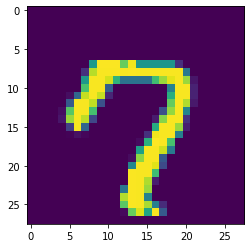

Neural network's guess:  7
Actual:  7


In [10]:
import matplotlib.pyplot as plt 
test_a_number = 3 # value must be from 0-9, as our batch-size was ten
plt.imshow(X[test_a_number].view(28,28))
plt.show()

print("Neural network's guess: ", torch.argmax(net(X[test_a_number].view(1,28*28))).item())
print("Actual: ", y[test_a_number].item())
